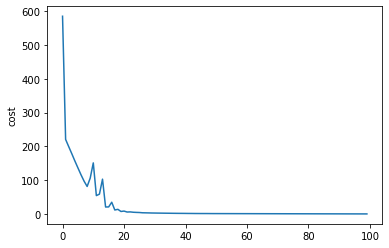

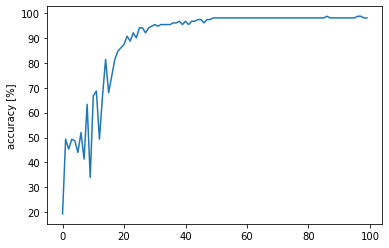

In [98]:
from sklearn.datasets import load_iris
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

# 전체 입력은 4차원, 출력은 3클래스: 정수(0, 1, 2)로 되어있음
iris = load_iris()          # 꽃 종류 data 3종류 있음, feature는 4개
x = iris.data 
y = iris.target
N,D = x.shape

x = np.hstack([np.ones((N,1)), x[:,0:4]])   #  design matrix
N,D = x.shape

# class +1 : sample은 black, decision region은 gray
# class -1 : sample은 red, decision region은 white
t = np.zeros(y.shape)
t[y == 0] = +1            #0이면 +1 아니면 -1
t[y != 0] = -1


# hyperparameter
eta = 0.001
maxEpoch = 100

cost = []
accuracy = []

# initialize
w = np.array([-10.0, 1.0, 1.0, 1.0, 1.0])


for epoch in range(maxEpoch):
    
    # prediction
    y_pred = x.dot(w)
    t_pred = np.sign(y_pred)

    # misclassified patterns
    id_misclass = np.where(y_pred*t < 0)[0]     # 만족하는 인덱스 반환 총 150개 중에서 잘못 분류된 인덱스 반환 ->튜플로 나와서 [0]적음
    #id_misclass = np.random.permutation(id_misclass)   # 순서를 섞어줌  -> 안섞어도 된다?
    
    if id_misclass.size == 0:
        break
    
    # cost
    cost.append(-np.sum(y_pred[id_misclass]*t[id_misclass]))
    accuracy.append(((len(t) - len(np.where(t_pred*t < 0)[0])) / len(t)) * 100 )
    
    
    # gradient descent
    for n in id_misclass:
        grad = (t[n]*x[n,:])
        w = w + eta * grad

plt.figure()
plt.plot(cost)
plt.ylabel("cost")
plt.figure()
plt.ylabel("accuracy [%]")
plt.plot(accuracy)

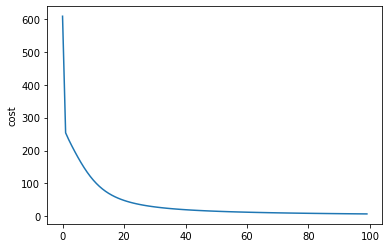

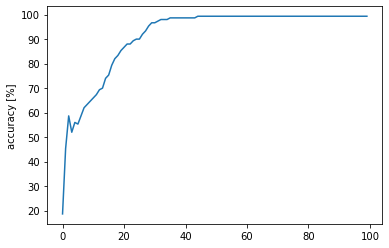

In [89]:
from sklearn.datasets import load_iris
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

# 전체 입력은 4차원, 출력은 3클래스: 정수(0, 1, 2)로 되어있음
iris = load_iris()          # 꽃 종류 data 3종류 있음, feature는 4개
x = iris.data 
y = iris.target
N,D = x.shape


# 입력은 3개만 사용: (bias, x[0], x[1])
# 출력은 binary로:  0인지 아닌지, 2class 문제로 바꿀거임 (원래는 3클래스 문제지만 우리는 2class 사용, 0인지 0이 아닌지)
x = np.hstack([np.ones((N,1)), x[:,0:4]])   #  design matrix
N,D = x.shape

t = np.zeros(y.shape)
t[y == 0] = +1
t[y != 0] = 0

def sigmoid(x):
    return 1 / (1 +np.exp(-x))

eta = 0.001
maxEpoch = 100

cost = []
accuracy = []

# initialize
w = np.array([-10, 1.0, 1.0, 1.0, 1.0])

for epoch in range(maxEpoch):    
    # prediction
    a_pred = x.dot(w)
    y_pred = sigmoid(a_pred)    
    class_pred = np.zeros(y.shape)
    class_pred[y_pred > 0.5] = 1
    class_pred[y_pred < 0.5] = 0
    
    # print(class_pred)
    id_misclass = np.where(class_pred != t )[0]
    # gradient descent
    grad = (y_pred - t).reshape(1,-1).dot(x).reshape(-1) #(y_pred - t).reshape(1,-1) => 1x150
    w = w - eta*grad
    
    # cost
    cost.append( -np.sum(t*np.log(y_pred) + (1 - t)*np.log(1 - y_pred)) )
    accuracy.append((len(t) - len(id_misclass)) / len(t) * 100)
    
plt.figure()
plt.plot(cost)
plt.ylabel("cost")
plt.figure()
plt.ylabel("accuracy [%]")
plt.plot(accuracy)